In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [7]:
# NBA Data Files
games = "Resources/games.csv"
games_details = "Resources/games_details.csv"
players = "Resources/players.csv"
ranking = "Resources/ranking.csv"
teams = "Resources/teams.csv"

In [8]:
# Read the data from games dataset
games_df = pd.read_csv(games)
print(games_df.shape)
pd.set_option('display.max_columns',50)
games_df.tail()

(26651, 21)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1
26650,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0


In [9]:
# Checking the date range of this data
# First finding the minimum year of this data
min_yr = games_df["SEASON"].min()

# Finding the maximum year of the data
max_yr = games_df["SEASON"].max()
print(f' This data is for NBA seasons from {min_yr} to {max_yr}')

 This data is for NBA seasons from 2003 to 2022


In [10]:
# How many games do I have data from?
games_df['GAME_ID'].nunique()

26622

In [11]:
# Looking at column names and data types to get a sense of the data that is present in this games dataset
games_df.dtypes

GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object

In [12]:
# Looking at unique counts to better understand this data
unique_counts = games_df.nunique()
print(unique_counts)

GAME_DATE_EST        4304
GAME_ID             26622
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 20
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           404
FT_PCT_home           410
FG3_PCT_home          437
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           393
FT_PCT_away           387
FG3_PCT_away          417
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64


In [13]:
# Read the data from games_details dataset
games_details_df = pd.read_csv(games_details)
print(games_details_df.shape)
games_details_df.head()

(668628, 29)


C:\Users\tyson\AppData\Local\Temp\ipykernel_23800\3967383474.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [14]:
# Finding the columns with mixed datatypes
for col in games_details_df:
    unique_types = games_details_df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col, unique_types)

NICKNAME [<class 'str'> <class 'float'>]
START_POSITION [<class 'str'> <class 'float'>]
COMMENT [<class 'float'> <class 'str'>]
MIN [<class 'str'> <class 'float'>]


In [15]:
# Looking at column names and data types to get a sense of the data that is present in this games_details dataset
games_details_df.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [16]:
# Read the data from players dataset
players_df = pd.read_csv(players)
print(players_df.shape)
players_df.head()

(7228, 4)


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [17]:
# Checking that the player IDs are consistent across dataframes

royce = 1626220
royce_check = games_details_df.loc[games_details_df['PLAYER_ID']== royce]
royce_check

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
165,22200470,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,26:50,5.0,7.0,0.714,4.0,6.0,0.667,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,2.0,14.0,28.0
723,22200447,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,31:37,4.0,6.0,0.667,3.0,4.0,0.750,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,11.0,-2.0
1147,22200433,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,32.000000:29,0.0,4.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,7.0,7.0,3.0,0.0,0.0,3.0,5.0,0.0,-4.0
2385,22200380,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:19,2.0,5.0,0.400,2.0,4.0,0.500,0.0,2.0,0.0,3.0,6.0,9.0,5.0,0.0,1.0,3.0,1.0,6.0,7.0
2658,22200364,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:22,1.0,6.0,0.167,1.0,4.0,0.250,0.0,0.0,0.0,2.0,2.0,4.0,4.0,1.0,0.0,1.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481478,21700023,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481825,21700010,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482834,11700058,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,9:23,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,6.0
482914,11700047,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,6:53,2.0,4.0,0.500,1.0,3.0,0.333,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,-2.0


In [18]:
# Read the data from ranking dataset
ranking_df = pd.read_csv(ranking)
print(ranking_df.shape)
ranking_df.head()

(210342, 13)


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [19]:
# Read the data from teams dataset
teams_df = pd.read_csv(teams)
print(teams_df.shape)
teams_df.head()

(30, 14)


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [20]:
# Create a new dataframe and merge both game datasets
game_data_merge_df = pd.merge(games_details_df, games_df, on='GAME_ID')
print(game_data_merge_df.shape)
pd.set_option('display.max_columns',50)
display(game_data_merge_df)

(669560, 49)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669556,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669557,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669558,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0


In [21]:
# Columns list for new df
game_data_merge_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [22]:
# Create a new dataframe and merge the team and rankings data sets
team_and_rankings_df = pd.merge(teams_df, ranking_df, on='TEAM_ID')
print(team_and_rankings_df.shape)
pd.set_option('display.max_columns',50)
display(team_and_rankings_df)

(210342, 26)


,LEAGUE_ID_x,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,LEAGUE_ID_y,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-22,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
1,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-21,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
2,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-20,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
3,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-19,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
4,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-18,East,Atlanta,30,15,15,0.500,9-5,6-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-05,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210338,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-04,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210339,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-03,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210340,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-02,West,Golden State,82,51,31,0.622,27-14,24-17,NaN


In [23]:
# Testing a few different ways to cutoff and clean this up to identify players

# Brainstorming:
# min games played, min minutes played / game, min average rebounds per game?
games_cutoff = 82

# Minutes played for each game included
minutes_cutoff = 18

# Average
reb_avg = 5

In [24]:
# Using variables to limit the players data set and checking the results of the std_dev calculation above for each

games_threshold = games_details_df['PLAYER_ID'].value_counts()
print(games_threshold)

PLAYER_ID
2544       1795
2617       1720
2738       1560
2730       1541
2594       1534
           ... 
201251        1
1629260       1
201252        1
974           1
203198        1
Name: count, Length: 2687, dtype: int64


In [25]:
# Filter out 'PLAYER_ID' values with less than 82 occurrences
valid_player_ids = games_threshold[games_threshold >= 82].index.tolist()

# Create a new DataFrame with 'PLAYER_ID's that have 82 or more occurrences
filtered_df = game_data_merge_df[game_data_merge_df['PLAYER_ID'].isin(valid_player_ids)]
filtered_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
5,22200477,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,NaN,NaN,18:04,2.0,6.0,0.333,0.0,0.0,0.000,2.0,2.0,1.000,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669556,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669557,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669558,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0


In [26]:
# Determine the top 50 players with the highest rebound averages
rebounds_avrg_filtered = filtered_df.groupby('PLAYER_ID').agg({'PLAYER_NAME':'first','TEAM_ID':'first','REB':'mean',}).reset_index()
rebounds_avrg_filtered

# Sort descending and display the top 50 players
ranked_reb = rebounds_avrg_filtered.sort_values(by=('REB'), ascending=False)
ranked_reb.head(50)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,REB
827,203083,Andre Drummond,1610612741,12.820950
386,2730,Dwight Howard,1610612747,11.627329
917,203497,Rudy Gobert,1610612750,11.465116
992,203954,Joel Embiid,1610612755,11.028777
1027,1626157,Karl-Anthony Towns,1610612750,10.985481
83,948,Marcus Camby,1610612746,10.718935
744,202355,Hassan Whiteside,1610612762,10.467938
1245,1629028,Deandre Ayton,1610612756,10.354037
1000,203991,Clint Capela,1610612737,10.351307
610,201567,Kevin Love,1610612739,10.300626


In [27]:
# Now answering our question about the most consistent players
# Our definition of 'most consistent' is 'has the smallest total standard devation in the dataset for a given stat'
# I will focus on rebounding statistics

rebounds_desc_stats = filtered_df.groupby('PLAYER_ID').agg(Player_Name = ('PLAYER_NAME','first'), Team_ID=('TEAM_ID','first'),
Reb_Mean = ('REB', 'mean'),Reb_Median = ('REB', 'median'),Reb_Stdev = ('REB', 'std'),
Reb_Var = ('REB', 'var'),Reb_Sem = ('REB', 'sem')).reset_index()
rebounds_desc_stats

# Sort this from smallest to largest
highest_perf_reb = rebounds_desc_stats.sort_values(by=['Reb_Mean'], ascending=False)
highest_perf_reb.head(50).sort_values(by=['Reb_Stdev'], ascending=True)

,PLAYER_ID,Player_Name,Team_ID,Reb_Mean,Reb_Median,Reb_Stdev,Reb_Var,Reb_Sem
1440,1630596,Evan Mobley,1610612739,8.409091,8.0,3.217770,10.354045,0.306802
1246,1629029,Luka Doncic,1610612742,8.469027,8.0,3.225465,10.403624,0.175183
1208,1628976,Wendell Carter Jr.,1610612753,8.733333,9.0,3.298873,10.882566,0.212941
562,201143,Al Horford,1610612738,8.039167,8.0,3.437656,11.817481,0.099237
985,203944,Julius Randle,1610612752,9.125620,9.0,3.475661,12.080220,0.141306
13,185,Chris Webber,1610612744,8.304348,8.0,3.497758,12.234308,0.210540
341,2547,Chris Bosh,1610612761,8.265014,8.0,3.537467,12.513670,0.109221
504,200746,LaMarcus Aldridge,1610612751,8.029605,8.0,3.698841,13.681427,0.106072
295,2397,Yao Ming,1610612745,9.265795,9.0,3.708710,13.754526,0.173108
1150,1628381,John Collins,1610612737,8.138965,8.0,3.715980,13.808505,0.193973


In [28]:
# Print the top 5 most consistent players in rebounds

Top_5_reb = ['Evan Mobley','Luka Doncic','Wendell Carter Jr.','Al Horford','Julius Randle']

print (r'The most consitent player at rebounding is :', Top_5_reb[0])
print (r'The 2nd most consitent player at rebounding is :', Top_5_reb[1])
print (r'The 3rd most consitent player at rebounding is :', Top_5_reb[2])
print (r'The 4th most consitent player at rebounding is :', Top_5_reb[3])
print (r'The 5th most consitent player at rebounding is :', Top_5_reb[4])


The most consitent player at rebounding is : Evan Mobley
The 2nd most consitent player at rebounding is : Luka Doncic
The 3rd most consitent player at rebounding is : Wendell Carter Jr.
The 4th most consitent player at rebounding is : Al Horford
The 5th most consitent player at rebounding is : Julius Randle


In [29]:
# Create a new Data frame for the top 50 players based on highest averages

top_50_reb_df = highest_perf_reb.head(50).sort_values(by=['Reb_Stdev'], ascending=True)

top_50_reb_df



,PLAYER_ID,Player_Name,Team_ID,Reb_Mean,Reb_Median,Reb_Stdev,Reb_Var,Reb_Sem
1440,1630596,Evan Mobley,1610612739,8.409091,8.0,3.217770,10.354045,0.306802
1246,1629029,Luka Doncic,1610612742,8.469027,8.0,3.225465,10.403624,0.175183
1208,1628976,Wendell Carter Jr.,1610612753,8.733333,9.0,3.298873,10.882566,0.212941
562,201143,Al Horford,1610612738,8.039167,8.0,3.437656,11.817481,0.099237
985,203944,Julius Randle,1610612752,9.125620,9.0,3.475661,12.080220,0.141306
13,185,Chris Webber,1610612744,8.304348,8.0,3.497758,12.234308,0.210540
341,2547,Chris Bosh,1610612761,8.265014,8.0,3.537467,12.513670,0.109221
504,200746,LaMarcus Aldridge,1610612751,8.029605,8.0,3.698841,13.681427,0.106072
295,2397,Yao Ming,1610612745,9.265795,9.0,3.708710,13.754526,0.173108
1150,1628381,John Collins,1610612737,8.138965,8.0,3.715980,13.808505,0.193973


In [30]:
# Create a seperate data frame for the rest of the league

reb_df_league = highest_perf_reb

reb_df_league

,PLAYER_ID,Player_Name,Team_ID,Reb_Mean,Reb_Median,Reb_Stdev,Reb_Var,Reb_Sem
827,203083,Andre Drummond,1610612741,12.820950,13.0,5.318247,28.283756,0.185608
386,2730,Dwight Howard,1610612747,11.627329,12.0,4.819731,23.229805,0.126616
917,203497,Rudy Gobert,1610612750,11.465116,12.0,4.852885,23.550494,0.179490
992,203954,Joel Embiid,1610612755,11.028777,11.0,3.907480,15.268401,0.191350
1027,1626157,Karl-Anthony Towns,1610612750,10.985481,11.0,3.944590,15.559789,0.168045
...,...,...,...,...,...,...,...,...
962,203912,C.J. Wilcox,1610612754,0.576471,0.0,0.836325,0.699440,0.090712
1388,1630210,Markus Howard,1610612743,0.547619,0.0,1.010842,1.021801,0.110292
1131,1627875,Marcus Georges-Hunt,1610612738,0.528302,0.0,1.186523,1.407837,0.162982
858,203116,Tyshawn Taylor,1610612751,0.485714,0.0,0.775398,0.601242,0.092678


In [31]:
# Define a function to create Linear Regression plots
def reb_linear_regression_plots( x_values, y_values,x1_values,y2_values,x_label,y_label,coordinate=(4,1)):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.scatter(x1_values,y2_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.title('Top 50 players vs The NBA League')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.savefig('TZ_Output_Visuals/Top 50 players vs The NBA League_Rebounds.png')
    plt.show()

The r-value is: 0.7906679736573208


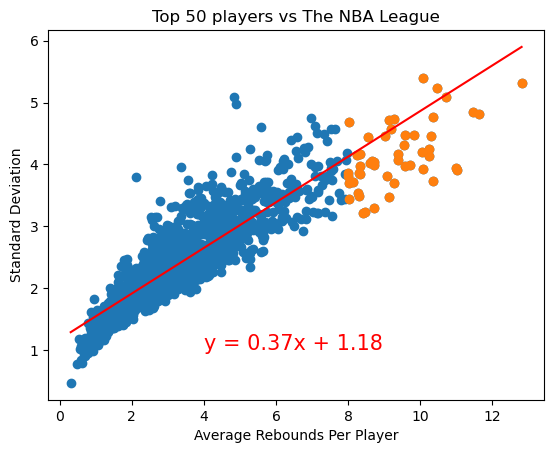

In [32]:
# Analyze the correlation between high performance and consistency

reb_linear_regression_plots(reb_df_league['Reb_Mean'],reb_df_league['Reb_Stdev'],
top_50_reb_df['Reb_Mean'],top_50_reb_df['Reb_Stdev'],'Average Rebounds Per Player','Standard Deviation',)

In [33]:
# Create Histogram and Compare the stand deviations of the top 50 players with the rest of the league

# Scatter Plot of Data
def rebound_data():
    population = reb_df_league
    sample = top_50_reb_df

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(population['Reb_Mean'], population['Reb_Stdev'], label="Rest of the League")
    plt.scatter(sample['Reb_Mean'], sample['Reb_Stdev'], label="Top 50")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population['Reb_Stdev'], 20, density=True, alpha=0.7, label="Rest of the League")
    plt.hist(sample['Reb_Stdev'], 20, density=True, alpha=0.7, label="Top 50")
    plt.axvline(population['Reb_Stdev'].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample['Reb_Stdev'].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  

    return population, sample

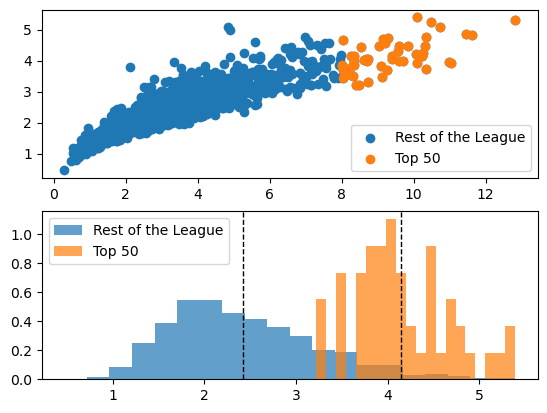

In [34]:
# Run the function to display the histogram and scatter plot

population, sample = rebound_data()

Text(0, 0.5, 'Frequency')

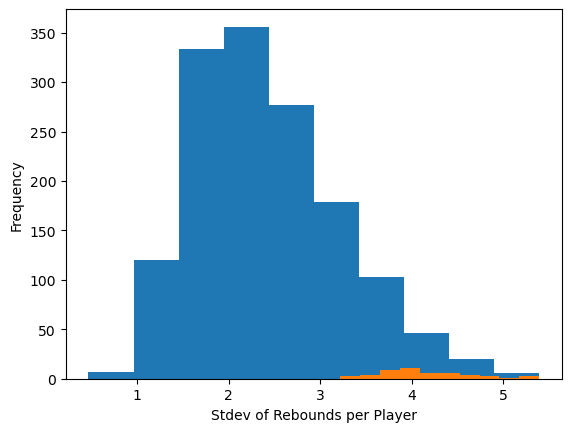

In [35]:
# Second Version of Histogram
reb_pop_hist = plt.hist(reb_df_league['Reb_Stdev'])
reb_top_50_hist = plt.hist(top_50_reb_df['Reb_Stdev'])
plt.xlabel('Stdev of Rebounds per Player')
plt.ylabel('Frequency')

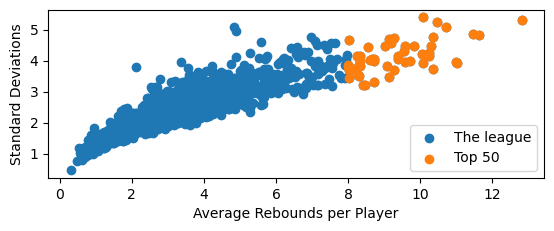

In [36]:
# Second version of Scatter Plot
reb_pop = reb_df_league['Reb_Stdev']
reb_top_50 = top_50_reb_df['Reb_Stdev']
plt.subplot(2, 1, 1)
plt.scatter(population['Reb_Mean'], population['Reb_Stdev'], label="The league")
plt.scatter(sample['Reb_Mean'], sample['Reb_Stdev'], label="Top 50")
plt.xlabel('Average Rebounds per Player')
plt.ylabel('Standard Deviations')
plt.legend()
plt.show()

In [39]:
# Run the T test and see if there is a statistical significance with high rebounding averages and consistency
stats.ttest_1samp(reb_top_50, reb_pop.mean())

TtestResult(statistic=23.16368326535982, pvalue=4.755563100474603e-28, df=49)